In [395]:
import networkx as nx

In [396]:
import pandas as pd
import numpy as np

In [308]:
hospitals = pd.read_csv("Hospital Locations.csv")
blood_centers = pd.read_csv("Blood Center Locations.csv")
travel_times = pd.read_csv("Travel Times.csv")
donation_data = pd.read_csv("Donation Data - Small Instance.csv")
requests = pd.read_csv("Requests.csv")

In [125]:
centers_count = blood_centers['Area'].value_counts()
centers_count
np.round(centers_count/hospitals_count,1)
hospitals_count = hospitals['Area'].value_counts()
hospital_list = hospitals['Hospital'].unique()

state_pop = {'Selangor':7.04, 'Johor':4.02, 'Sabah':3.39, 'Perak':2.52, 'Sarawak':2.47, 'Kedah':2.17, 
              'Kuala Lumpur':1.96, 'Kelantan':1.83, 'Pulau Pinang':1.74, 'Pahang':1.61,
             'Negeri Sembilan':1.21, 'Terengganu':1.19, 'Melaka':1.01, 'Perlis':0.29, 
             'Putrajaya':0.12, 'Labuan':0.10, 'Malacca':1.01, 'Penang':1.8 }
hosp_pops = [state_pop[x] for x in hospitals['Area'] ]
daily_demand = [poisson.rvs(x*5) for x in hosp_pops]


In [157]:
demand_list = np.array()
for i in range(7):
    daily_demand = np.array()
    for j in range(len(hospital_list)):
        daily_demand.append(poisson.rvs(state_pop[hospitals.loc[j, 'Area']]*10))
    demand_list.append(daily_demand)

In [190]:
vals = list(blood_dist.values())

In [275]:
poisson_ = poisson.rvs(state_pop[hospitals.loc[0, 'Area']]*10, size=7)

In [276]:
multiply = [[x * y for y in vals] for x in poisson_]

In [166]:
blood_dist = {'A_pos':0.2454, 'B_pos':0.2956, 'O_pos':0.3777, 'AB_pos':0.0651, 
 'A_neg':0.0035, 'B_neg':0.0064,'O_neg':0.005, 'AB_neg':0.0014 }

In [134]:
inv_capacity = {'Hospital Duchess Of Kent':500.0, 'Hospital Melaka':1600, 'Hospital Miri':600,
       'Hospital Pulau Pinang':1600, 'Hospital Queen Elizabeth II':2000,
       'Hospital Raja Perempuan Zainab II':1500,
       'Hospital Raja Permaisuri Bainun':2000, 'Hospital Seberang Jaya':1000,
       'Hospital Seri Manjung':500, 'Hospital Sibu':600,
       'Hospital Sultan Haji Ahmad Shah':800, 'Hospital Sultanah Aminah':1700,
       'Hospital Sultanah Bahiyah':3500, 'Hospital Sultanah Nora Ismail':800,
       'Hospital Sultanah Nur Zahirah':1600, 'Hospital Taiping':900,
       'Hospital Tawau':600, 'Hospital Tengku Ampuan Afzan':1000,
       'Hospital Tengku Ampuan Rahimah':1700, 'Hospital Tuanku Jaafar':1000,
       'Hospital Umum Sarawak':1100, 'Pusat Darah Negara':9200}

In [150]:
state_pop = {'Selangor':7.04, 'Johor':4.02, 'Sabah':3.39, 'Perak':2.52, 'Sarawak':2.47, 'Kedah':2.17, 
              'Kuala Lumpur':1.96, 'Kelantan':1.83, 'Pulau Pinang':1.74, 'Pahang':1.61,
             'Negeri Sembilan':1.21, 'Terengganu':1.19, 'Melaka':1.01, 'Perlis':0.29, 
             'Putrajaya':0.12, 'Labuan':0.10, 'Malacca':1.01, 'Penang':1.8 }

In [415]:
#Initialize Graph Representing Blood Supply Chain Network
graph = nx.DiGraph()

In [416]:
#Initialize Blood Center Nodes in Graph (Supplier)
'''
Node Attribute Values

name: Blood Center Name
IO: Initial Inventory of the Blood Center/ Number of donations on the first day 
C: Inventory Capacity of the Blood Center
h: Unit holding Cost for excess on-hand inventory
'''
for i, value in enumerate(blood_centers['Name'][0:22]):
    graph.add_nodes_from([i], name= value, 
                     IO = list(donation_data.iloc[i,4:]),
                     C = inv_capacity[value],
                     h = 1)

In [417]:
#Initialize Hospital Nodes in Graph (Retail)
'''
Node Attribute Values

name: Hospital Name
I: Inventory available at the hospital of each blood type
'''
for i, value in enumerate(hospitals['Hospital']):
    graph.add_nodes_from([i+len(blood_centers)], name= value, 
                         I = np.zeros(8))

In [418]:
#Initialize Patient Request Nodes in Graph (Retail)
'''
Node Attribute Values

name: Hospital Name
request: Inventory available at the hospital of each blood type
'''
for i, value in enumerate(hospitals['Hospital']):
    graph.add_nodes_from([i+len(blood_centers)+len(hospitals)], name= value+'-Patient', 
                         I = np.zeros(8))

In [419]:
#Initialize edges between Blood Centers and Hospitals
'''
Edge Attribute Values

p: Unit price to send materials between blood center i and hospital j
L: lead time in between adjacent nodes
b: Cost of unfulfilled demand
demand_dist: demand distribution for (blood_center, hospital) edge 
dist_param: value for parameter fed to statistical distribution
'''
for i in range(len(blood_centers)):   
    for j in range(len(hospitals)):
        graph.add_edges_from([(i, j+22, {'p': 0.7*int(travel_times.iloc[i,j+1])+16.24 ,
                                         'L': travel_times.iloc[i,j+1],
                                         'g': 1})])

In [421]:
#Initialize edges between Hospitals and Patients
'''
Edge Attribute Values

p: Unit price to send materials between blood center i and hospital j
L: lead time in between adjacent nodes
b: Cost of unfulfilled demand
demand_dist: demand distribution for (blood_center, hospital) edge 
dist_param: value for parameter fed to statistical distribution
'''
for i in range(len(hospitals)):
    graph.add_edges_from([(i+22, i+147+22, {'p': 0,
                                     'L': 0,
                                     'b': 110,
                                     'demand_dist': poisson,
                                     'dist_param': {'mu': state_pop[hospitals.loc[i,'Area']]}})])

In [452]:
#Define the user defined patient demand for input
user_D = {}
for i in range(147):
    key = (i+22, i+169)
    ind = list(np.arange(0,441,147))
    user_D[key] = np.array(requests.iloc[ind, 4:])

In [422]:
list(graph.nodes(data=True))


[(0,
  {'name': 'Hospital Duchess Of Kent',
   'IO': [18, 19, 26, 7, 18, 0, 19, 0, 26, 0, 7, 0],
   'C': 500.0,
   'h': 1}),
 (1,
  {'name': 'Hospital Melaka',
   'IO': [31, 32, 53, 5, 30, 1, 30, 2, 52, 1, 5, 0],
   'C': 1600,
   'h': 1}),
 (2,
  {'name': 'Hospital Miri',
   'IO': [23, 24, 34, 4, 23, 0, 24, 0, 34, 0, 4, 0],
   'C': 600,
   'h': 1}),
 (3,
  {'name': 'Hospital Pulau Pinang',
   'IO': [5, 7, 7, 2, 5, 0, 7, 0, 7, 0, 2, 0],
   'C': 1600,
   'h': 1}),
 (4,
  {'name': 'Hospital Queen Elizabeth II',
   'IO': [17, 21, 30, 3, 17, 0, 20, 1, 29, 1, 3, 0],
   'C': 2000,
   'h': 1}),
 (5,
  {'name': 'Hospital Raja Perempuan Zainab II',
   'IO': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   'C': 1500,
   'h': 1}),
 (6,
  {'name': 'Hospital Raja Permaisuri Bainun',
   'IO': [34, 15, 33, 10, 33, 1, 15, 0, 33, 0, 10, 0],
   'C': 2000,
   'h': 1}),
 (7,
  {'name': 'Hospital Seberang Jaya',
   'IO': [8, 17, 15, 2, 8, 0, 17, 0, 15, 0, 2, 0],
   'C': 1000,
   'h': 1}),
 (8,
  {'name': 'Hospital 

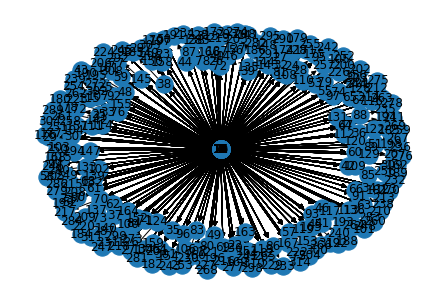

In [423]:
nx.draw(graph, with_labels=True)

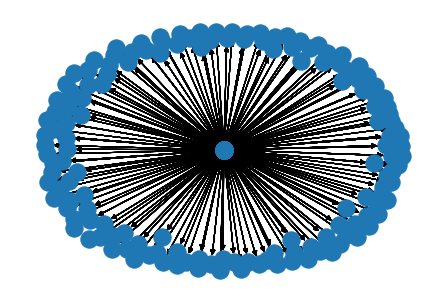

In [408]:
nx.draw_spring(graph)

In [94]:
from scipy.stats import poisson